In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

preDouble = "\\\\iobsdc01\\SharedDocs\\SEER_MEDICARE\\SEER_MEDICARE_STAGING"
new = os.chdir(preDouble)
#print(preDouble)

In [2]:
import pickle
fileObject = open('control_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
controlindices = list(b)

In [3]:
import pickle
fileObject = open('treatment_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
treatmentindices = list(b)

In [4]:
df = pd.read_pickle('dfpedsfFirsts.pickle')

In [5]:
mask = (df['srvm1'] != 9999)
dfall = df[mask]


In [6]:
geomask = (dfall['elevation_1'] != dfall['FIPScombo_1']) 

dfall = dfall[geomask].copy()


In [7]:
dfall['elevation_1'].replace('99999',np.nan,inplace=True)
dfall['elevation_2'].replace('99999',np.nan,inplace=True)
dfall['elevation_3'].replace('99999',np.nan,inplace=True)

dfall['lat_1'].replace('99999',np.nan,inplace=True)
dfall['lat_2'].replace('99999',np.nan,inplace=True)
dfall['lat_3'].replace('99999',np.nan,inplace=True)

dfall['lng_1'].replace('99999',np.nan,inplace=True)
dfall['lng_2'].replace('99999',np.nan,inplace=True)
dfall['lng_3'].replace('99999',np.nan,inplace=True)

dfall['elevation_1'] = dfall['elevation_1'].astype('float')
dfall['elevation_2'] = dfall['elevation_2'].astype('float')
dfall['elevation_3'] = dfall['elevation_3'].astype('float')

dfall['lat_1'] = dfall['lat_1'].astype('float')
dfall['lat_2'] = dfall['lat_2'].astype('float')
dfall['lat_3'] = dfall['lat_3'].astype('float')

dfall['lng_1'] = dfall['lng_1'].astype('float')
dfall['lng_2'] = dfall['lng_2'].astype('float')
dfall['lng_3'] = dfall['lng_3'].astype('float')

In [8]:
dfall.set_index('patient_id', inplace=True,drop=False)

In [9]:
dfall.patient_id.isin(treatmentindices).sum()

1055

In [10]:
dfall.patient_id.isin(controlindices).sum()

1055

In [11]:
dfall.shape

(719821, 496)

In [12]:
dfalltreatment = dfall.loc[treatmentindices].copy()
dfallcontrol = dfall.loc[controlindices].copy()

In [13]:
dfalltreatment.shape

(1055, 496)

In [15]:
dfallcontrol.shape

(1055, 496)

In [16]:
catcols = ['m_sex','marst1','srace','nhiade','grade1',
           'site1',
          'histrec1',
           'modx1','stat_rec']


goodcols = ['m_sex','marst1', 'srace','nhiade',
           'grade1','site1',
           'lat1','histrec1',
           'modx1','stat_rec','birthyr',
           'agedx1',
           'yrdx1','elevation_1',
           'lng_1']

In [17]:
dfpop = pd.concat([dfallcontrol, dfalltreatment])


In [18]:
resgoodcontrol = pd.concat([pd.get_dummies(dfallcontrol[col],prefix=col) for col in catcols], axis=1)

resgoodtreatment = pd.concat([pd.get_dummies(dfalltreatment[col],prefix=col) for col in catcols], axis=1)

resgoodpop = pd.concat([pd.get_dummies(dfpop[col],prefix=col) for col in catcols], axis=1)

In [19]:
resgoodcontrol['birthyr'] = dfallcontrol['birthyr']
resgoodcontrol['agedx1'] = dfallcontrol['agedx1']

resgoodcontrol['yrdx1'] = dfallcontrol['yrdx1']

resgoodcontrol['lat_1'] = dfallcontrol['lat_1']

resgoodcontrol['lng_1'] = dfallcontrol['lng_1']

resgoodcontrol['srvm1'] = dfallcontrol['srvm1']

resgoodcontrol['elevation_1'] = dfallcontrol['elevation_1']

In [20]:
resgoodtreatment['birthyr'] = dfalltreatment['birthyr']
resgoodtreatment['agedx1'] = dfalltreatment['agedx1']

resgoodtreatment['yrdx1'] = dfalltreatment['yrdx1']



resgoodtreatment['lat_1'] = dfalltreatment['lat_1']

resgoodtreatment['lng_1'] = dfalltreatment['lng_1']

resgoodtreatment['srvm1'] = dfalltreatment['srvm1']

resgoodtreatment['elevation_1'] = dfalltreatment['elevation_1']

In [21]:
resgoodpop['birthyr'] = dfpop['birthyr']
resgoodpop['agedx1'] = dfpop['agedx1']

resgoodpop['yrdx1'] = dfpop['yrdx1']




resgoodpop['lat_1'] = dfpop['lat_1']

resgoodpop['lng_1'] = dfpop['lng_1']

resgoodpop['srvm1'] = dfpop['srvm1']

resgoodpop['elevation_1'] = dfpop['elevation_1']

# <font color="#E56717">Kaplan-Meier Survival Curves after performing the patient matching</font>

<span style="font-size:1.5em;">Below we will show the Kaplan-Meier survival curves for the group of PBT patients and the corresponding group of matched controls who received any other form of RT</span>

* <span style="font-size:1.5em;">All sites combined</span>
* <span style="font-size:1.5em;">Just prostate cancer: PBT is better</span>
* <span style="font-size:1.5em;">All sites except for prostate cancer</span>
* <span style="font-size:1.5em;">Eye and Orbit</span>
* <span style="font-size:1.5em;">Lung: PBT is better</span>
* <span style="font-size:1.5em;">Brain</span>
* <span style="font-size:1.5em;">Head and Neck</span>
* <span style="font-size:1.5em;">Breast</span>

# <font color="#E56717">Distribution of sites (includes both PBT and RT patients)</font>

| site | count | broad grouping |
|:------:|:----------:|:-----------|
| Prostate gland | 1870 | Prostate |
| Choroid | 96 | Eye and Orbit |
| Upper lobe, lung | 64 | Lung |
| Lower long, lung | 14 | Lung | 
| Cerebral meninges | 8 | Brain |
| Upper-outer quadrant of breast | 8 | Breast |
| Frontal lobe | 8 | Brain |
| Lower third of esophagus | 6 | Head and Neck |
| Temporal lobe | 4 | Brain |
| Main bronchus | 4 | Lung | 
| Lower-inner quadrant of breast | 4 | Breast |
| Ciliary body | 4 | Eye and Orbit |
| Lung, NOS | 4 | Lung |
| Overlapping lesion of breast | 4 | Breast |
| Middle third of esophagus | 2 | Head and Neck |
| Parotid gland | 2 | Head and Neck |
| Parietal  lobe | 2 | Brain |
| Retina | 2 | Eye and Orbit |
| Acoustic nerve | 2 | Head and Neck |
| Cervical esophagus | 2 | Head and Neck |

In [102]:
dfpop.site1.value_counts()

Prostate gland                    1870
Choroid                             96
Upper lobe, lung                    64
Lower lobe, lung                    14
Cerebral meninges                    8
Upper-outer quadrant of breast       8
Frontal lobe                         8
Lower third of esophagus             6
Temporal lobe                        4
Main bronchus                        4
Lower-inner quadrant of breast       4
Ciliary body                         4
Lung, NOS                            4
Overlapping lesion of breast         4
Middle third of esophagus            2
Parotid gland                        2
Parietal lobe                        2
Retina                               2
Acoustic nerve                       2
Cervical esophagus                   2
Name: site1, dtype: int64

In [108]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodpop.loc[controlindices]["srvm1"]
Econtrol = resgoodpop.loc[controlindices]["stat_rec_Dead"]

Ttreatment = resgoodpop.loc[treatmentindices]["srvm1"]
Etreatment = resgoodpop.loc[treatmentindices]["stat_rec_Dead"]

Tpop = resgoodpop["srvm1"]
Epop = resgoodpop["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 1055 observations, 950 censored>

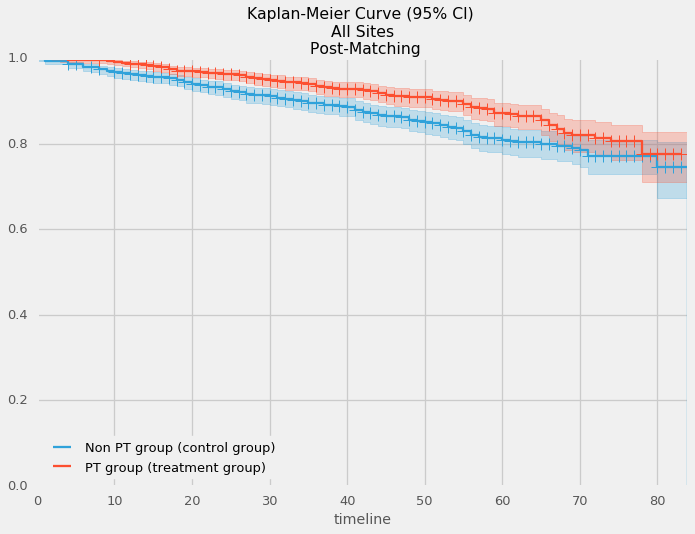

In [109]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax,show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \n All Sites \n Post-Matching");

In [110]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   df: 1
   test: logrank
   t 0: -1
   null distribution: chi squared
   alpha: 0.95

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00175 |              9.795 |      Reject Null    |        True       


In [111]:
prostate_filter = dfpop.site1.str.contains('prostate',case=False,na=False)

eye_filter = dfpop.site1.str.contains('choroid',case=False,na=False) | \
             dfpop.site1.str.contains('ciliary',case=False,na=False) | \
             dfpop.site1.str.contains('retina',case=False,na=False) 
        
lung_filter = dfpop.site1.str.contains('lung',case=False,na=False) | \
              dfpop.site1.str.contains('bronchus',case=False,na=False)
    
brain_filter = dfpop.site1.str.contains('cerebral',case=False,na=False) | \
             dfpop.site1.str.contains('frontal',case=False,na=False) | \
            dfpop.site1.str.contains('temporal', case=False,na=False) | \
            dfpop.site1.str.contains('parietal', case=False,na=False)
    
head_and_neck_filter  =      dfpop.site1.str.contains('parotid',case=False,na=False) | \
      dfpop.site1.str.contains('esophagus',case=False,na=False) | \
      dfpop.site1.str.contains('acoustic',case=False,na=False)
        
breast_filter = dfpop.site1.str.contains('breast',case=False,na=False)

In [112]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodpop[prostate_filter].loc[controlindices]["srvm1"]
Econtrol = resgoodpop[prostate_filter].loc[controlindices]["stat_rec_Dead"]

Ttreatment = resgoodpop[prostate_filter].loc[treatmentindices]["srvm1"]
Etreatment = resgoodpop[prostate_filter].loc[treatmentindices]["stat_rec_Dead"]

#Tpop = resgoodpop["srvm1"]
#Epop = resgoodpop["stat_rec_Dead"]

#kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 1055 observations, 1003 censored>

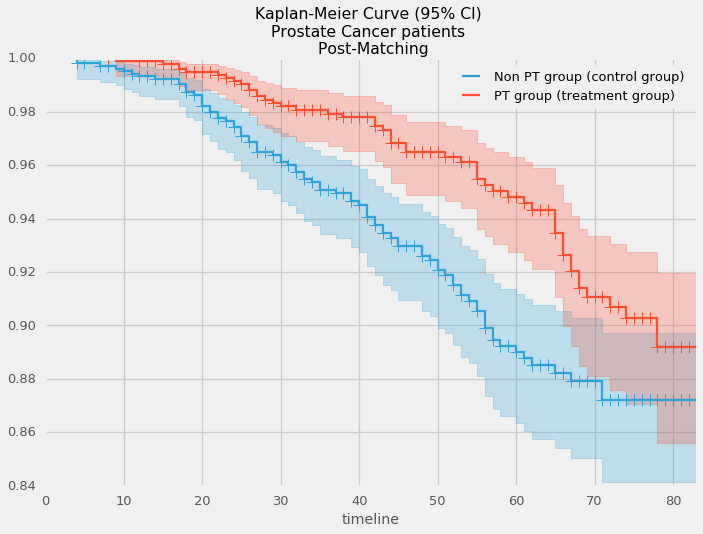

In [113]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax,show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nProstate Cancer patients \n Post-Matching");

In [114]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()


Results
   df: 1
   test: logrank
   t 0: -1
   null distribution: chi squared
   alpha: 0.95

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00310 |              8.747 |      Reject Null    |        True       


In [115]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodpop[~prostate_filter].loc[controlindices]["srvm1"]
Econtrol = resgoodpop[~prostate_filter].loc[controlindices]["stat_rec_Dead"]

Ttreatment = resgoodpop[~prostate_filter].loc[treatmentindices]["srvm1"]
Etreatment = resgoodpop[~prostate_filter].loc[treatmentindices]["stat_rec_Dead"]

#Tpop = resgoodpop["srvm1"]
#Epop = resgoodpop["stat_rec_Dead"]

#kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 1055 observations, -2147482646 censored>

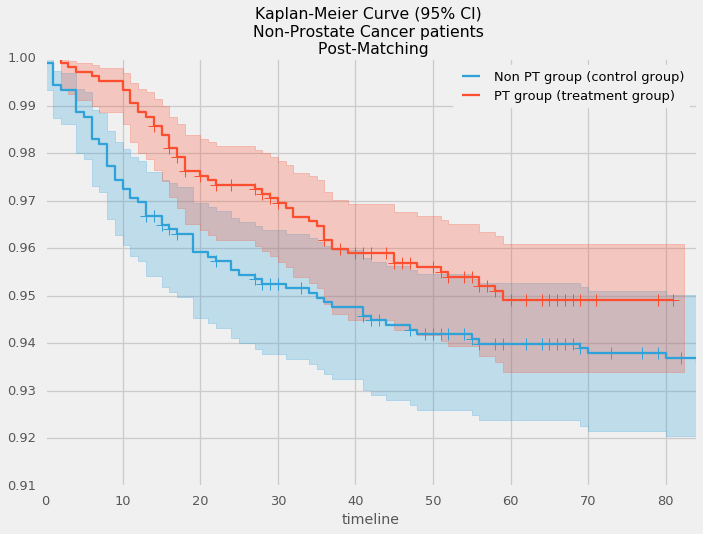

In [116]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax,show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nNon-Prostate Cancer patients \n Post-Matching");

In [117]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()


Results
   df: 1
   test: logrank
   t 0: -1
   null distribution: chi squared
   alpha: 0.95

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.03862 |              4.277 |      Reject Null    |        True       


In [118]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodpop[eye_filter].loc[controlindices]["srvm1"]
Econtrol = resgoodpop[eye_filter].loc[controlindices]["stat_rec_Dead"]

Ttreatment = resgoodpop[eye_filter].loc[treatmentindices]["srvm1"]
Etreatment = resgoodpop[eye_filter].loc[treatmentindices]["stat_rec_Dead"]

#Tpop = resgoodpop["srvm1"]
#Epop = resgoodpop["stat_rec_Dead"]

#kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 1055 observations, 1042 censored>

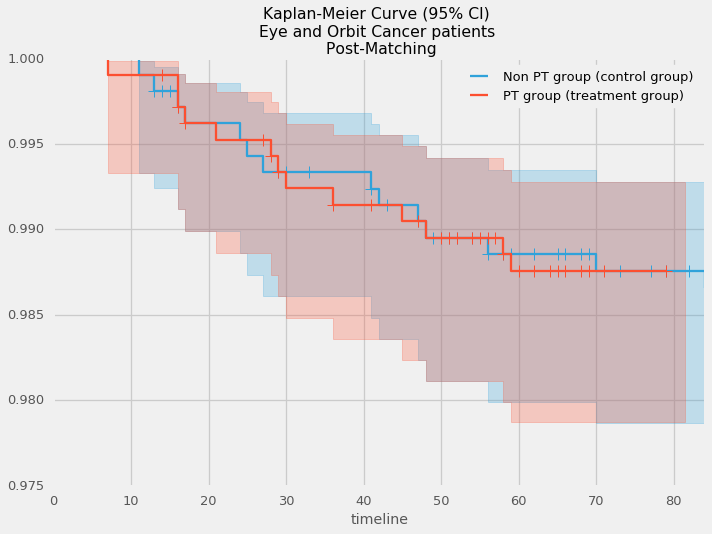

In [119]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax,show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nEye and Orbit Cancer patients \n Post-Matching");

In [120]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodpop[lung_filter].loc[controlindices]["srvm1"]
Econtrol = resgoodpop[lung_filter].loc[controlindices]["stat_rec_Dead"]

Ttreatment = resgoodpop[lung_filter].loc[treatmentindices]["srvm1"]
Etreatment = resgoodpop[lung_filter].loc[treatmentindices]["stat_rec_Dead"]

#Tpop = resgoodpop["srvm1"]
#Epop = resgoodpop["stat_rec_Dead"]

#kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 1055 observations, 1027 censored>

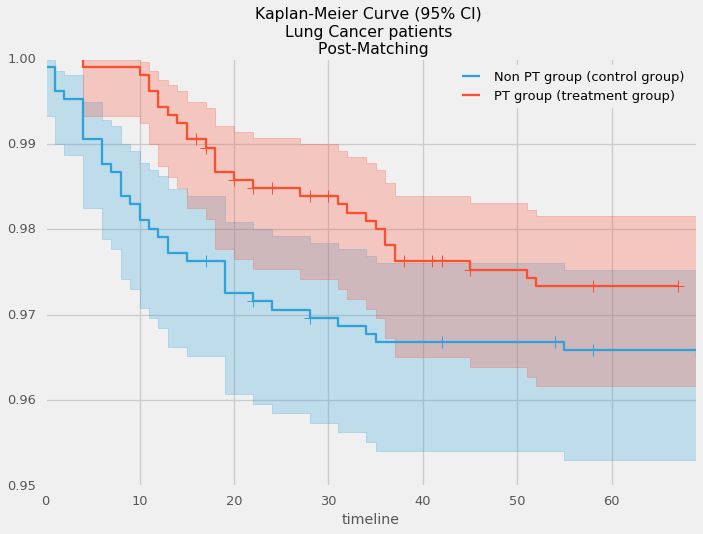

In [121]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax,show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nLung Cancer patients \n Post-Matching");

In [122]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   df: 1
   test: logrank
   t 0: -1
   null distribution: chi squared
   alpha: 0.95

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00228 |              9.313 |      Reject Null    |        True       


In [123]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodpop[brain_filter].loc[controlindices]["srvm1"]
Econtrol = resgoodpop[brain_filter].loc[controlindices]["stat_rec_Dead"]

Ttreatment = resgoodpop[brain_filter].loc[treatmentindices]["srvm1"]
Etreatment = resgoodpop[brain_filter].loc[treatmentindices]["stat_rec_Dead"]

#Tpop = resgoodpop["srvm1"]
#Epop = resgoodpop["stat_rec_Dead"]

#kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 1055 observations, 1048 censored>

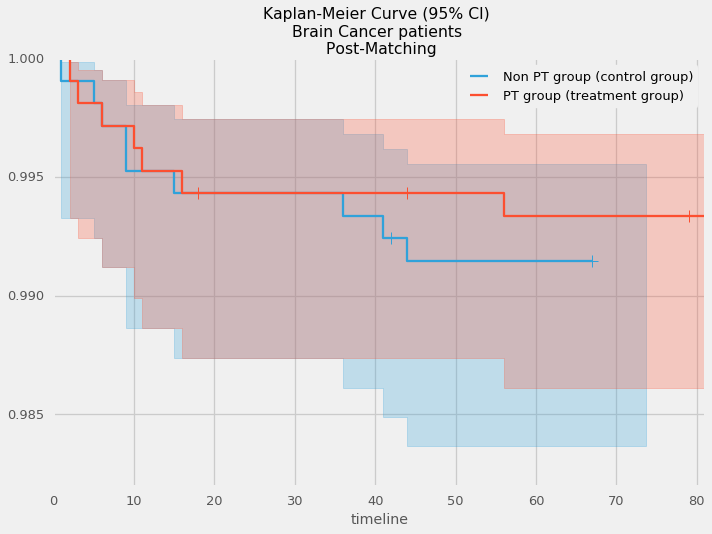

In [124]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax,show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nBrain Cancer patients \n Post-Matching");

In [125]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   df: 1
   test: logrank
   t 0: -1
   null distribution: chi squared
   alpha: 0.95

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.43941 |              0.598 |  Cannot Reject Null |       False       


In [126]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodpop[head_and_neck_filter].loc[controlindices]["srvm1"]
Econtrol = resgoodpop[head_and_neck_filter].loc[controlindices]["stat_rec_Dead"]

Ttreatment = resgoodpop[head_and_neck_filter].loc[treatmentindices]["srvm1"]
Etreatment = resgoodpop[head_and_neck_filter].loc[treatmentindices]["stat_rec_Dead"]

#Tpop = resgoodpop["srvm1"]
#Epop = resgoodpop["stat_rec_Dead"]

#kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 1055 observations, 1051 censored>

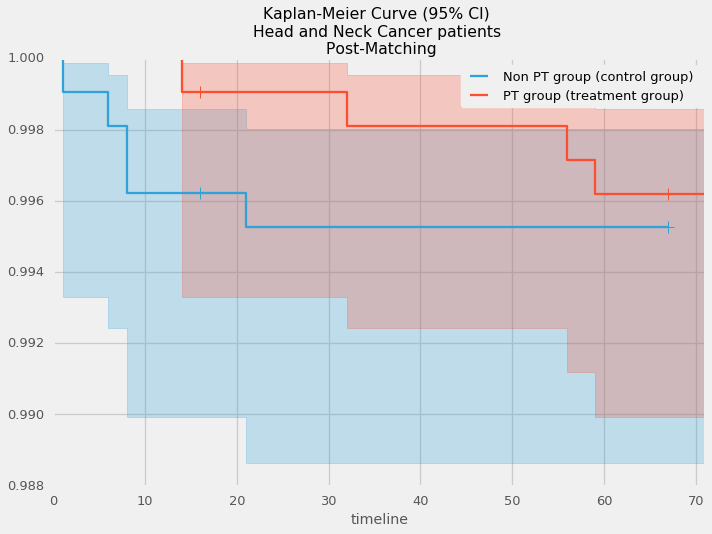

In [127]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax,show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nHead and Neck Cancer patients \n Post-Matching");

In [128]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   df: 1
   test: logrank
   t 0: -1
   null distribution: chi squared
   alpha: 0.95

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.13992 |              2.179 |  Cannot Reject Null |       False       


In [129]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()


resgoodpopbreast = resgoodpop[breast_filter].copy()

Tcontrol = resgoodpopbreast.loc[controlindices]["srvm1"]
Econtrol = resgoodpopbreast.loc[controlindices]["stat_rec_Dead"]

Ttreatment = resgoodpopbreast.loc[treatmentindices]["srvm1"]
Etreatment = resgoodpopbreast.loc[treatmentindices]["stat_rec_Dead"]

#Tpop = resgoodpop["srvm1"]
#Epop = resgoodpop["stat_rec_Dead"]

#kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 1055 observations, -2147482594 censored>

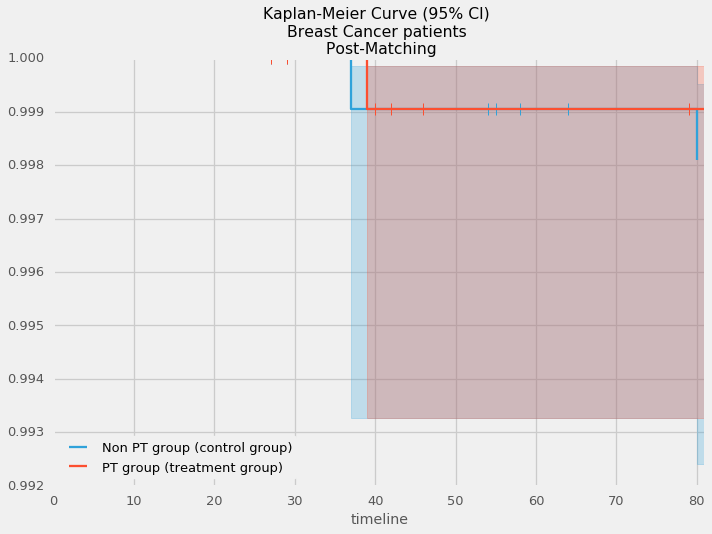

In [130]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax,show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nBreast Cancer patients \n Post-Matching");

In [73]:
#breast_filter.sum()